Initial hidden weights: [0.9496976  0.17450048] [0.92961157 0.38580184]
Initial hidden biases: [0.72877788 0.76286855]
Initial output weights: [0.7696844] [0.79078258]
Initial output biases: [0.87090639]
-----------------------------------learning rate = 0.010000----------------------------
Final hidden weights: [1.67483138 0.12592543] [1.67049528 0.36399842]
Final hidden bias: [0.36942158 0.68550269]
Final output weights: [1.27142432] [-0.37545323]
Final output bias: [-0.75605453]
ERROR =[-0.43687467] [0.47727717] [0.47261923] [-0.54939192]
15000


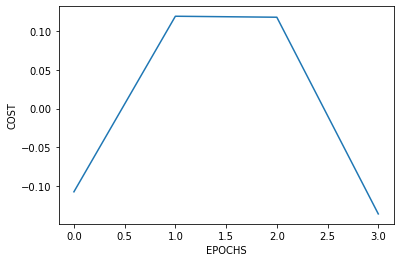


Output from neural network after 15,000 epochs: [0.43687467] [0.52272283] [0.52738077] [0.54939192]
-----------------------------------learning rate = 0.100000----------------------------
Final hidden weights: [6.11010155 4.03793047] [6.14562112 4.04539847]
Final hidden bias: [-2.64444281 -6.20065143]
Final output weights: [8.30282531] [-9.02426187]
Final output bias: [-3.76643049]
ERROR =[-0.03790956] [0.03369403] [0.03376803] [-0.0356937]
15000


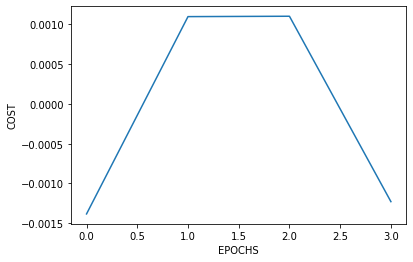


Output from neural network after 15,000 epochs: [0.03790956] [0.96630597] [0.96623197] [0.0356937]
-----------------------------------learning rate = 0.500000----------------------------
Final hidden weights: [6.70938396 4.78065877] [6.72820816 4.78514539]
Final hidden bias: [-3.01773654 -7.33808989]
Final output weights: [10.23067592] [-10.95538667]
Final output bias: [-4.75280985]
ERROR =[-0.01361556] [0.01163294] [0.01164723] [-0.01198604]
15000


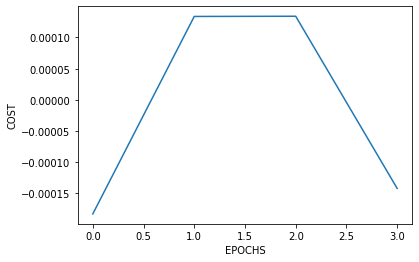


Output from neural network after 15,000 epochs: [0.01361556] [0.98836706] [0.98835277] [0.01198604]
-----------------------------------learning rate = 0.800000----------------------------
Final hidden weights: [6.94777971 5.05936611] [6.96234503 5.06292852]
Final hidden bias: [-3.1526075  -7.75946308]
Final output weights: [11.06388004] [-11.77118361]
Final output bias: [-5.18088395]
ERROR =[-0.00872853] [0.00739523] [0.0074023] [-0.00757365]
15000


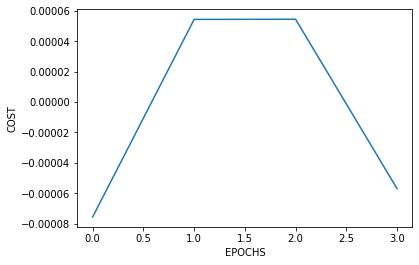


Output from neural network after 15,000 epochs: [0.00872853] [0.99260477] [0.9925977] [0.00757365]
-----------------------------------learning rate = 1.000000----------------------------
Final hidden weights: [7.09121176 5.22390306] [7.10368389 5.2269872 ]
Final hidden bias: [-3.23165202 -8.0074317 ]
Final output weights: [11.58514555] [-12.279914]
Final output bias: [-5.4485884]
ERROR =[-0.00661012] [0.0055783] [0.00558287] [-0.00569671]
15000


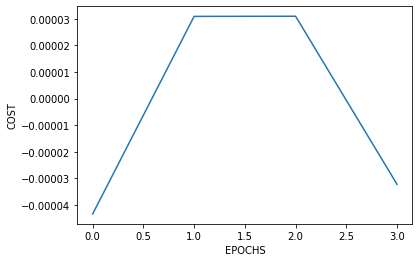


Output from neural network after 15,000 epochs: [0.00661012] [0.9944217] [0.99441713] [0.00569671]


In [17]:
import numpy as np
from matplotlib import pyplot as plt

def sigmoid (x):
    return 1/(1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

#Input datasets
inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
expected_output = np.array([[0],[1],[1],[0]])

epochs = 15000

inputLayerNeurons, hiddenLayerNeurons, outputLayerNeurons = 2,2,1

#Random weights and bias initialization
hidden_weights = np.random.uniform(size=(inputLayerNeurons,hiddenLayerNeurons))
hidden_bias =np.random.uniform(size=(1,hiddenLayerNeurons))
output_weights = np.random.uniform(size=(hiddenLayerNeurons,outputLayerNeurons))
output_bias = np.random.uniform(size=(1,outputLayerNeurons))

print("Initial hidden weights: ",end='')
print(*hidden_weights)
print("Initial hidden biases: ",end='')
print(*hidden_bias)
print("Initial output weights: ",end='')
print(*output_weights)
print("Initial output biases: ",end='')
print(*output_bias)


for lr in [0.01,0.1,0.5,0.8,1]:
    cost=[]
    print("-----------------------------------learning rate = %f----------------------------"%(lr))
    #Training algorithm
    for i in range(epochs):
        #print(i,end="")
        #print(inputs,end="")
        #Forward Propagation
        hidden_layer_activation = np.dot(inputs,hidden_weights)
        hidden_layer_activation += hidden_bias
        hidden_layer_output = sigmoid(hidden_layer_activation)

        output_layer_activation = np.dot(hidden_layer_output,output_weights)
        output_layer_activation += output_bias
        predicted_output = sigmoid(output_layer_activation)
        #print(predicted_output,end="")

        #Backpropagation
        error = expected_output - predicted_output
        cost_i=0.5*((sum(error)/len(error))**2)
        cost.extend(cost_i)
        d_predicted_output = error * sigmoid_derivative(predicted_output)
        
        error_hidden_layer = d_predicted_output.dot(output_weights.T)
        d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)
        #print(error,end="")
        

        #Updating Weights and Biases
        output_weights += hidden_layer_output.T.dot(d_predicted_output) * lr
        output_bias += np.sum(d_predicted_output,axis=0,keepdims=True) * lr
        hidden_weights += inputs.T.dot(d_hidden_layer) * lr
        hidden_bias += np.sum(d_hidden_layer,axis=0,keepdims=True) * lr
        #print()

    print("Final hidden weights: ",end='')
    print(*hidden_weights)
    print("Final hidden bias: ",end='')
    print(*hidden_bias)
    print("Final output weights: ",end='')
    print(*output_weights)
    print("Final output bias: ",end='')
    print(*output_bias)
    print("ERROR =",end="")
    print(*error)
    print(len(cost))
    plt.figure() 
    plt.plot(d_predicted_output) 
    plt.xlabel("EPOCHS") 
    plt.ylabel("COST") 
    plt.show()

    print("\nOutput from neural network after 15,000 epochs: ",end='')
    print(*predicted_output)
    
    

-----------------------0---------------------


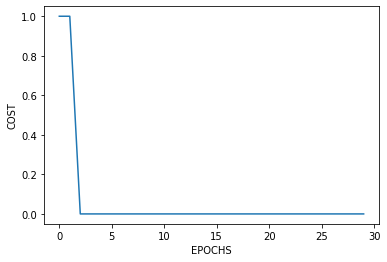

Trained weight = [0.0, -0.1, -0.1, 0.0, 0.0, 0.0, 0.0, 0.0]
Expected=1, Predicted=1
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
-----------------------1---------------------


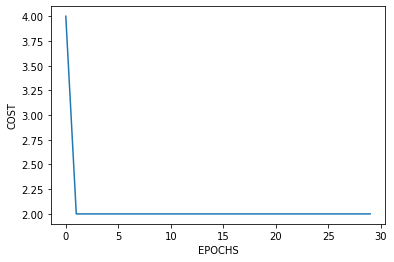

Trained weight = [-0.2, -0.1, 0.0, -0.1, -0.1, 0.0, -0.1, -0.1]
Expected=0, Predicted=0
Expected=1, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
-----------------------2---------------------


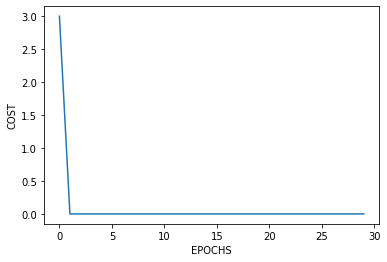

Trained weight = [-0.1, 0.0, -0.1, 0.0, 0.1, 0.0, 0.0, 0.0]
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=1, Predicted=1
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
-----------------------3---------------------


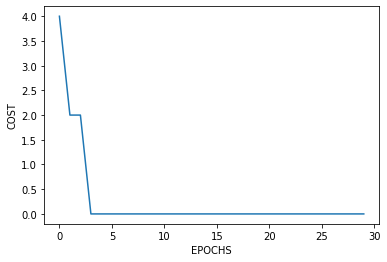

Trained weight = [-0.20000000000000004, 0.1, 0.0, 0.1, -0.1, -0.2, 0.1, 0.0]
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=1, Predicted=1
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
-----------------------4---------------------


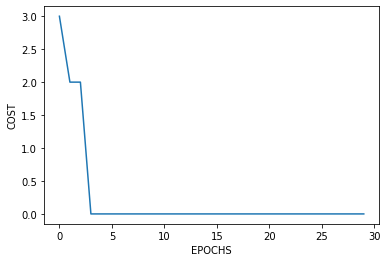

Trained weight = [-0.1, -0.1, 0.0, -0.2, 0.0, 0.1, -0.2, 0.1]
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=1, Predicted=1
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
-----------------------5---------------------


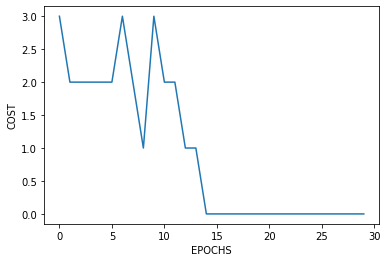

Trained weight = [-0.2, -0.6, -0.1, 0.2, -0.6, 0.0, 0.2, 0.0]
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=1, Predicted=1
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
-----------------------6---------------------


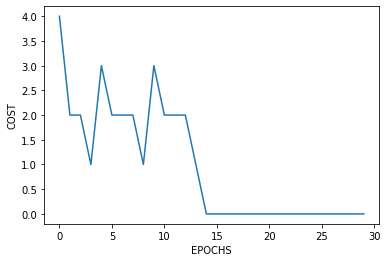

Trained weight = [-0.30000000000000004, -0.7999999999999999, -0.2, 0.1, 0.6, -0.1, 0.1, -0.1]
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=1, Predicted=1
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
-----------------------7---------------------


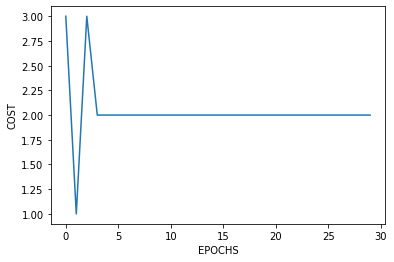

Trained weight = [-0.1, 0.1, 0.1, -0.1, -0.1, -0.1, -0.1, -0.1]
Expected=0, Predicted=0
Expected=0, Predicted=1
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=1, Predicted=1
Expected=0, Predicted=0
Expected=0, Predicted=0
-----------------------8---------------------


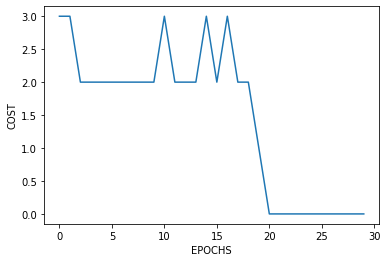

Trained weight = [-0.6, 0.20000000000000004, 0.10000000000000003, -0.20000000000000004, 0.6, 0.4, -0.20000000000000004, -0.20000000000000004]
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=1, Predicted=1
Expected=0, Predicted=0
-----------------------9---------------------


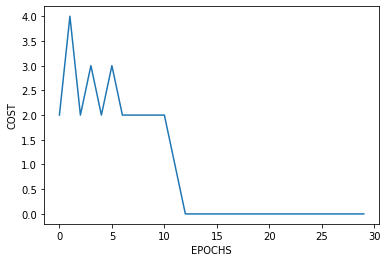

Trained weight = [-0.5, 0.20000000000000004, -0.1, 0.0, -0.2, 0.6, 0.0, -0.2]
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=1, Predicted=1


In [14]:
from matplotlib import pyplot as plt
digit_R=[[0,0,0,0,0,0,0],
         [1,1,0,0,0,0,0],
         [1,0,1,1,0,1,1],
         [1,1,1,0,0,1,1],
         [0,1,0,0,1,0,1],
         [0,1,1,0,1,1,1],
         [0,1,1,1,1,1,1],
         [1,1,0,0,0,0,0],
         [1,1,1,1,1,1,1],
         [1,1,1,0,1,1,1]]

y = [[1,0,0,0,0,0,0,0,0,0],
     [0,1,0,0,0,0,0,0,0,0],
     [0,0,1,0,0,0,0,0,0,0],
     [0,0,0,1,0,0,0,0,0,0],
     [0,0,0,0,1,0,0,0,0,0],
     [0,0,0,0,0,1,0,0,0,0],
     [0,0,0,0,0,0,1,0,0,0],
     [0,0,0,0,0,0,0,1,0,0],
     [0,0,0,0,0,0,0,0,1,0],
     [0,0,0,0,0,0,0,0,0,1]]

# Make a prediction with weights
def predict(row,weights):
	activation = weights[0]
	#print(len(row))
	for i in range(len(row)):
		activation += weights[i + 1] * row[i]
	return 1.0 if activation >= 0.0 else 0.0


# Estimate Perceptron weights using stochastic gradient descent
def train_weights(train,y, l_rate, n_epoch):
	weights = [0.0 for i in range(len(train[0])+1)]
	cost=[]
	for epoch in range(n_epoch):
		sum_error = 0.0
		for row,i in zip(train,y):
			prediction = predict(row, weights)
			error = i - prediction
			sum_error += error**2
			weights[0] = weights[0] + l_rate * error   #bias update
			for i in range(len(row)):
				weights[i + 1] = weights[i+1] + l_rate * error * row[i]   #weight update 
		cost.extend([sum_error])
	plt.figure()
	plt.plot(cost)
	plt.xlabel("EPOCHS")
	plt.ylabel("COST")
	plt.show(),cost.clear()
	return weights


def perceptron_learning_algorithm(logic,y,name) :
    l_rate = 0.1
    n_epoch = 30
    print("-----------------------%s---------------------" %(name))
    weights = train_weights(logic,y,l_rate, n_epoch)
    print("Trained weight = %s" %(weights))
    for row,i in zip(logic,y):
        prediction = predict(row, weights)
        print("Expected=%d, Predicted=%d" % (i, prediction))
    return(weights)

for i in range(10):
    perceptron_learning_algorithm(digit_R,y[i],i)

In [10]:
list_num = []
list_num.extend([1, 2])  # extending list elements
print(list_num)
list_num = []
list_num.extend((3, 4))  # extending tuple elements
print(list_num)
list_num.extend("ABC")  # extending string elements
print(list_num)

[1, 2]
[3, 4]
[3, 4, 'A', 'B', 'C']
